# Week 10: Acquiring and Manipulating Videos

<font size="6"> Laboratory 7 </font> <br>
<font size="3"> Last updated Jan 5, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- N/A
    
<font size="5"> Programming Skills </font>
- Using Software Documentation
- OpenCV (cv2)
    
<font size="5"> Embedded Systems </font>
- Thonny and MicroPython

## <span style="color:orange;"> 0. Required Hardware </span>
- Microcontroller: Raspberry Pi Pico
- Breadboard
- USB connector
- Camera (Arducam HM01B0)

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Jun Kil 

**Email:** kilj@purdue.edu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## <span style="color:orange;"> 1. Reading Videos with OpenCV </span>

In this lab, we will be using a Python library called OpenCV (cv2). From the [official documentation](https://docs.opencv.org/4.x/d1/dfb/intro.html), "OpenCV is an open-source library that includes several hundreds of computer vision algorithms." Today, we will mostly be using it to read and display modified video frames, and we will be doing the "vision" in computer vision manually with our own functions.

Run the following cell to read in the video file. Using `vid.read()`, returns two values: the Boolean varible `success`, which is `True` if the frame was read without any errors, and `frame` which is as it sounds the image that is captured from the video. The camera hardware you will connect to your Pico can only return grayscale images, so we are converting each frame to grayscale using the function `cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)`. For speed in later computations, it is helpful to reduce the frame size. Here, we've scaled down each frame by a factor of 4.

Running the cell will cause a separate window to pop up, displaying the smaller, grayscale video. After reading in the whole video, the separate window will close automatically; you can override this by pressing the "Q" key on your keyboard.

Download the video file we'll be using for this lab: [test_vid.mov](https://github.com/TheDataScienceLabs/DataLab_Multivariate_Calculus/blob/main/book/labs/2_Video_Labs/test_vid.mov). This is a video from Youtube showing a bouncing ball.
<!-- COPYRIGHTS???? It would be best to make our own. -->

In [88]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


### <span style="color:red"> Exercise 1 </span>

In the cell above, we scale down the orginal video frames by a factor of 4 by defining `new_size` and using `cv2.resize()`.

Open and watch the above video again, this time scaled down each frame by a factor of 8. How much less CPU time does it take to play the video, compared to when you only scaled it down by a factor 4?


<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Below </h3>

It should take about 1/4 the CPU time to process the video when scaled down by a factor of 8 compared to when scaled down by a factor of 4.

## <span style="color:orange;"> 2. Modifying Videos </span>

### <span style="color:red"> Exercise 2 </span>

Read the [documentation](https://docs.opencv.org/2.4/modules/highgui/doc/user_interface.html?highlight=waitkey) for the `waitKey` function.

**Part 1**

Play the video slower than its original playback speed.

**Part 2** 

Play the video faster than its original playback speed.

<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Part 1 Below </h3>

In [3]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(50) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Part 2 Below </h3>

In [4]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(12) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


### <span style="color:red"> Exercise 3 </span>

Play the video backward.

<h3 style="background-color:lightblue"> Write Answers for Exercise 3 Below </h3>

In [5]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale), int(height*scale))

frame_no = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(frame_no-1, -1, -1):
    vid.set(cv2.CAP_PROP_POS_FRAMES, i)
    success, frame = vid.read()
    if not success:
        print(f"Unable to read frame {i}. Exiting ...")
        continue
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame, dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

Unable to read frame 382. Exiting ...
Unable to read frame 381. Exiting ...
Unable to read frame 380. Exiting ...
Unable to read frame 379. Exiting ...
Unable to read frame 378. Exiting ...
Unable to read frame 377. Exiting ...
Unable to read frame 376. Exiting ...
Unable to read frame 375. Exiting ...
Unable to read frame 374. Exiting ...
Unable to read frame 373. Exiting ...
Unable to read frame 372. Exiting ...
Unable to read frame 371. Exiting ...
Unable to read frame 370. Exiting ...
Unable to read frame 369. Exiting ...
Unable to read frame 368. Exiting ...
Unable to read frame 367. Exiting ...
Unable to read frame 366. Exiting ...
Unable to read frame 365. Exiting ...
Unable to read frame 364. Exiting ...
Unable to read frame 363. Exiting ...
Unable to read frame 362. Exiting ...
Unable to read frame 361. Exiting ...
Unable to read frame 360. Exiting ...
Unable to read frame 359. Exiting ...
Unable to read frame 358. Exiting ...
Unable to read frame 357. Exiting ...
Unable to re

### <span style="color:red"> Exercise 4 </span>

**Part 1**

Flip the video's visuals over the y-axis.

**Part 2**

Flip the video's visuals over the x-axis.

*Hint: There are many ways to do this, but you can look into NumPy or OpenCV's flip function.* 

<h3 style="background-color:lightblue"> Write Answers for Exercise 4 Part 1 Below </h3>

In [6]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

<h3 style="background-color:lightblue"> Write Answers for Exercise 4 Part 2 Below </h3>

In [7]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.flip(frame, 0)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

Being able to extract specific frames from a video is a useful skill. It can be used, for example, to trim the ends of the video or to remove a section in the middle.

### <span style="color:red"> Exercise 5 </span>

Extract the first 200 frames of the video. 

<h3 style="background-color:lightblue"> Write Answers for Exercise 5 Below </h3>

In [8]:
vid = cv2.VideoCapture('test_vid.mov')
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
scale = 0.25
new_size = (int(width * scale), int(height * scale))

counter = 0

while vid.isOpened() and counter < 200:
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame, dsize=new_size)
    cv2.imshow('frame', frame)

    if cv2.waitKey(25) == ord('q'):  # press Q on keyboard to stop
        break

    counter += 1

vid.release()
cv2.destroyAllWindows()

## <span style="color:orange;"> 3. Connecting the Camera </span>

This time, we will be recording our own videos using the Arducam HM01B0, which is a small camera that can be hooked up to the Pico. 

### Wiring Instructions

Please make sure your microcontroller is not plugged to the computer while you are wiring things together. Ask the instructor if you are unsure about your wiring. Use your jumper wires to make the following connections.

| HM01B0 | Pico |
|--------|------|
| VCC    | 3V3  |
| SCL    | GP5  |
| SDA    | GP4  |
| VSYNC  | GP16 |
| HREF   | GP15 |
| PCLK   | GP14 |
| DO     | GP6  |
| GND    | GND  |

<!-- ![img](camera.jpg)

*Wiring the Arducam HM01B0 camera* 

![img](camerawiring.jpg)

*Connections to the PICO on breadboard* -->


After ensuring that the wiring is correct, hold down the BOOTSEL button on the Pico and plug it in. Download [arducam.uf2](https://github.com/TheDataScienceLabs/DataLab_Multivariate_Calculus/blob/main/book/labs/2_Video_Labs/arducam.uf2) and copy it onto the Pico's drive, which should have popped up in your folders as an option. The Pico should automatically disconnect once the file has transferred, then its LED will start blinking rapidly. 

Once the Pico has been successfully connected, run the following cell to make sure we have detected the Pico successfully.

In [41]:
import time
import serial
from serial.tools import list_ports

PICO_HWID = "2E8A"


def get_pico_port():
    pico_ports = list(list_ports.grep(PICO_HWID))
    if len(pico_ports) == 0:
        raise Exception(
            "No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it"
        )
    return pico_ports[0].device


print("Here are all the serial devices detected:")
for port in list_ports.comports():
    print(port.device, port.hwid)

port = get_pico_port()
print(f"\nselected port {port} as most likely to have a raspberry pi pico")

Here are all the serial devices detected:
/dev/ttyS1 n/a
/dev/ttyS0 PNP0501
/dev/ttyACM0 USB VID:PID=2E8A:000A SER=E660C0621343722D LOCATION=1-1.3:1.0

selected port /dev/ttyACM0 as most likely to have a raspberry pi pico


### Capturing a still image

Now that the Pico and camera have been connected, run the following cell to get a still image.

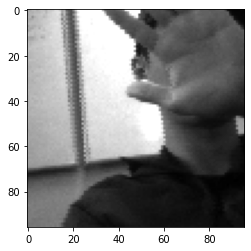

In [72]:
buffer = bytearray(96 * 96)
img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img.flat[::-1] = buffer
    
img1 = img
    
plt.imshow(img, cmap="gray")
plt.show()

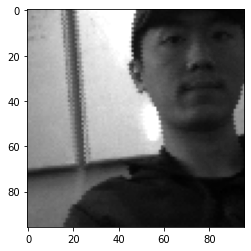

In [73]:
buffer = bytearray(96 * 96)
img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img.flat[::-1] = buffer
    
img2 = img
    
plt.imshow(img, cmap="gray")
plt.show()

### <span style="color:red"> Exercise 6 </span>

Use the camera to acquire an image of yourself with your hand up, and an image of yourself with your hands down. Use these two frames (you are welcome to use more than 2 frames if desired) to create a video of yourself moving your hands up and down that lasts a few seconds. 

<h3 style="background-color:lightblue"> Write Answers for Exercise 6 Below </h3>

In [110]:
use_img1 = True

while True:
    if use_img1:
        frame = img1
    else:
        frame = img2
    
    if len(frame.shape) == 3 and frame.shape[2] == 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(50) == ord('q'): # press Q on keyboard to stop
        break
    
    use_img1 = not use_img1
    
cv2.destroyAllWindows()

### Streaming video

Now that we can capture a still image, the next goal is to stream a video. Both cells will have to be run before the video is streamed to your screen. After running the first one, a still image should pop up but once you run the second cell it should start streaming what your camera is seeing in real-time.

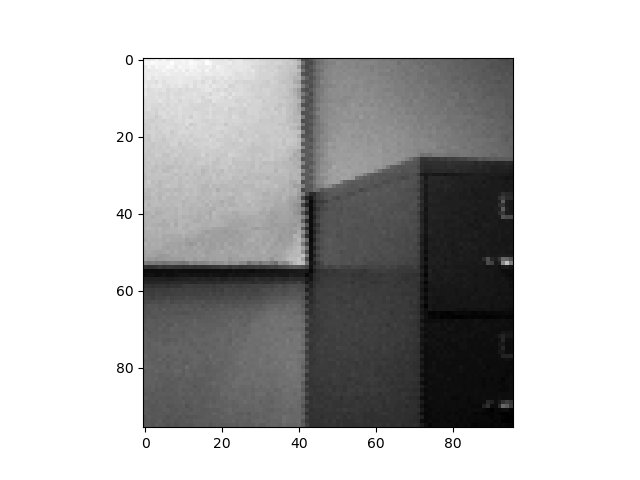

In [81]:
%matplotlib widget

fig, ax = plt.subplots()
render = ax.imshow(img, cmap='gray')
plt.show(block=False)

In [82]:
try:
    with serial.Serial(port, timeout=1) as s:
        while True:
            s.read_until(b"\x55\xAA")
            s.readinto(buffer)
            img.flat[::-1] = buffer
            render.set_data(img)
            fig.canvas.draw()
except KeyboardInterrupt:
    pass

When you are done, you will have to hit the `Interrupt Kernel` button, which can found at the top of the screen (the stop symbol) or under Kernel.

## <span style="color:orange;"> 4. Modifying Your Own Video </span>

Now that you are able to capture your own video, you will try the same modifications you made on the prerecorded videos on the one you recorded.

### <span style="color:red"> Exercise 7 </span>

Capture and save a list of frames using the camera.

**Part 1:** Either trim both ends of the video or remove a section in the middle.

**Part 2:** Save another list of frames from a second video. Splice the two videos together so that one plays after the other.

**Part 3:** Pick an editing function we haven't mentioned (e.g., adding text, video filters, etc.) and try it out on either the prerecorded video or the ones you recorded using the camera.


<h3 style="background-color:lightblue"> Write Answers for Exercise 7 Below </h3>

In [117]:
# part1: trim 50 frames from both ends
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

frames = []

while vid.isOpened() and len(frames) < 250:
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    frames.append(frame)  # Append the current frame to the list

trimmed_frames = frames[50:-50]

use_frame = 0

while True:
    if use_frame >= len(trimmed_frames):
        break
    
    frame = trimmed_frames[use_frame]
    
    if len(frame.shape) == 3 and frame.shape[2] == 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(50) == ord('q'): # press Q on keyboard to stop
        break
    
    use_frame += 1
    
cv2.destroyAllWindows()

In [115]:
# part2. Instead of using 2 different videos, I used 2 different list of frames from the same video.
vid = cv2.VideoCapture('test_vid.mov')
num_frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))

list1 = []
list2 = []

# Capture every frame for list1 and every 10th frame for list2
for i in range(num_frames):
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    list1.append(frame_gray)
    if i % 10 == 0:
        list2.append(frame_gray)

# splice list1 and 2
new_list = []
for frame1, frame2 in zip(list1, list2):
    new_list.append(frame1)
    new_list.append(frame2)

for frame in new_list:
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break

cv2.destroyAllWindows()


Unable to read frame. Exiting ...


In [125]:
# part 3
vid = cv2.VideoCapture('test_vid.mov')
num_frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))

frames = []

for i in range(num_frames):
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frames.append(frame)

for frame in frames:
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    text = 'I love MA290'
    cv2.putText(frame_gray, text, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    cv2.imshow('frame', frame_gray)
    
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break

cv2.destroyAllWindows()

Unable to read frame. Exiting ...


## <span style="color:green"> Reflection </span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I did the first few parts pretty well, like flipping the axes and extracting the frames of the video.
2. It was my first time playing with Arducam and it was fun.
3. The part about storing frames as a list could have more elaboration or an example for guidance.
4. NA